# Laboratorio de regresión logística

|                |                      |
:----------------|----------------------|
| **Nombre**     | Gonzalo Cano Padilla |
| **Fecha**      | 2 de octubre 2025    |
| **Expediente** | 745901               |

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [1]:
import pandas as pd

datos = pd.read_csv('Default.csv')
datos

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [2]:
datos.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [3]:
datos.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

* En el DataFrame vienen las columnas de 'default', 'student' las cuales tiene datos de tipo objeto como si y no, que se pueden convertir en datos booleanos con dummies o en variables categóricas.
* En la columna 'balance', 'income' vienen datos de tipo float osea datos numericos

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [4]:
datos['default'] = datos['default'].astype('category')

In [5]:
datos['student'] = datos['student'].astype('category')

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

<Axes: title={'center': 'income'}, xlabel='default'>

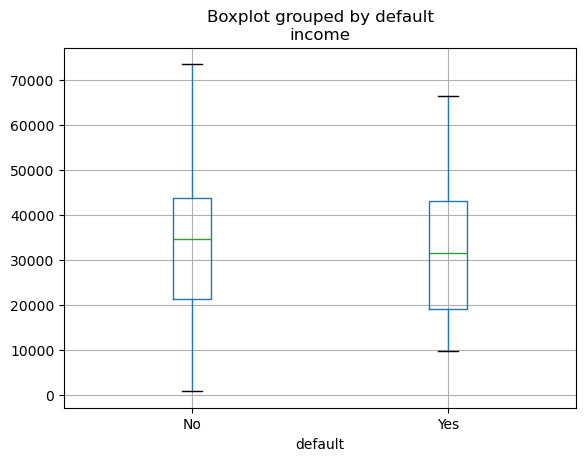

In [6]:
datos.boxplot(column='income', by='default')

<Axes: title={'center': 'balance'}, xlabel='default'>

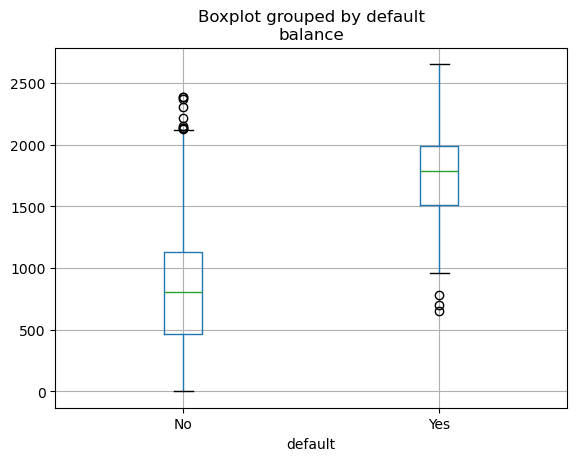

In [7]:
datos.boxplot(column='balance', by='default')

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Axes: xlabel='balance', ylabel='income'>

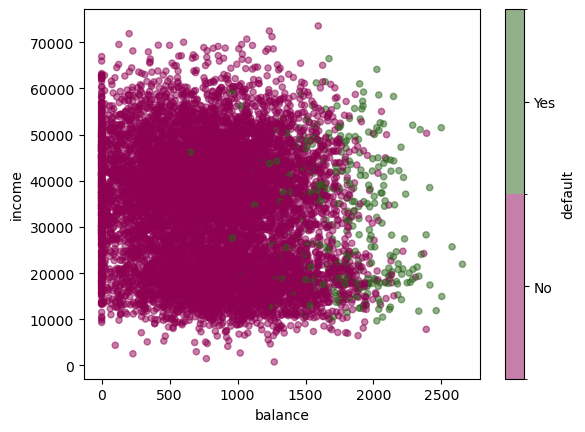

In [8]:
datos.plot.scatter('balance', 'income', c='default', colormap='PiYG', alpha = 0.5)

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [9]:
y = datos['default'] == 'Yes'
x = datos['balance'].values.reshape(-1,1)

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

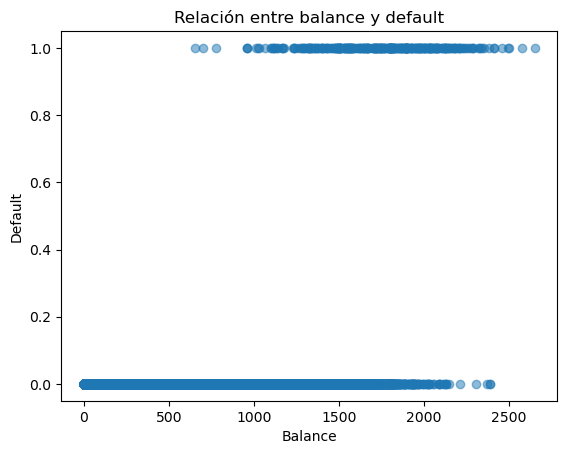

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.5)
plt.title("Relación entre balance y default")
plt.xlabel("Balance")
plt.ylabel("Default")
plt.show()

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [12]:
lr.intercept_

array([-10.65132824])

In [13]:
lr.coef_

array([[0.00549892]])

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [14]:
import numpy as np

b0 = lr.intercept_
b1 = lr.coef_

pred = 1/(1+ np.exp(-(b0 +b1*x)))
pred

array([[1.30568146e-03],
       [2.11259754e-03],
       [8.59474814e-03],
       ...,
       [2.46651596e-03],
       [1.16759635e-01],
       [7.14476480e-05]])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [15]:
p = pred*(1-pred)
p

array([[1.30397665e-03],
       [2.10813447e-03],
       [8.52087844e-03],
       ...,
       [2.46043226e-03],
       [1.03126823e-01],
       [7.14425432e-05]])

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [16]:
V = np.diagflat(p)

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [17]:
n = len(x)
X = np.hstack((np.ones((n,1)), x))

cov = np.linalg.inv(X.T @ V @ X)

In [18]:
cov

array([[ 1.30442757e-01, -7.81757265e-05],
       [-7.81757265e-05,  4.85656561e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [19]:
se = np.sqrt(np.diag(cov))

In [20]:
se

array([3.61168600e-01, 2.20376169e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [21]:
z0 = b0/se[0]
z1 = b1/se[1]

In [22]:
z0, z1

(array([-29.49129089]), array([[24.95240552]]))

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [23]:
from scipy.stats import norm

p_value_b0 = 2 * (1-norm.cdf(abs(z0)))
p_value_b1 = 2 * (1-norm.cdf(abs(z1)))

In [25]:
print(f"p value b0 = {p_value_b0}")
print(f"p value b1 = {p_value_b1}")

p value b0 = [0.]
p value b1 = [[0.]]


¿Es significativa la relación de los factores con la variable de respuesta?

Si es significativa la relación de el balance con la probabilidad de default, ya que tenemos un p_value de 0 que nos dice que el balance esta relacionado con la probabilidad de que un cliente no pague su crédito

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [33]:
y = datos['default'] == 'Yes'
x = (datos['student'] == 'Yes').values.reshape(-1,1)

lr.fit(x,y)

#Coeficientes
b0 = lr.intercept_
b1 = lr.coef_

pred = 1/(1+ np.exp(-(b0 +b1*x)))

# Error p(1-p) y matriz diagonal de probabilidades
error= pred*(1-pred)
V = np.diagflat(error)

# Matriz de covarianza
n = len(x)
X = np.hstack((np.ones((n,1)), x))
cov = np.linalg.inv(X.T @ V @ X)

# Error estandar
se = np.sqrt(np.diag(cov))

# Estadístico z
z0 = b0/se[0]
z1 = b1/se[1]

# P_values
p_value_b0 = 2 * (1-norm.cdf(abs(z0)))
p_value_b1 = 2 * (1-norm.cdf(abs(z1)))

# Resultados
print(f"B0 = {b0}")
print(f"B1 = {b1}")
print(f"Matriz de covarianza = {cov}")
print(f"Error estandar = {se}")
print(f"p value b0 = {p_value_b0}")
print(f"p value b1 = {p_value_b1}")

B0 = [-3.50257249]
B1 = [[0.39620888]]
Matriz de covarianza = [[ 0.00499304 -0.00499304]
 [-0.00499304  0.01327579]]
Error estandar = [0.07066143 0.11522061]
p value b0 = [0.]
p value b1 = [[0.00058452]]


Viendo el p-value podemos decir que el factor student si es significativo, pot lo cual nos dice que ser estudiante si esta relacionado con la probabilidad de que el cliente no pague.

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [42]:
y = datos['default'] == 'Yes'
balance = datos['balance'].values.reshape(-1,1)
income = datos['income'].values.reshape(-1,1)
student = (datos['student'] == 'Yes').values.reshape(-1,1)
x = np.hstack([balance, income, student])
lr.fit(x,y)

# Coeficientes
b0 = lr.intercept_
betas = lr.coef_

# Predicciones
pred = 1/(1+np.exp(-(b0 + x @ betas.reshape(-1,1))))

# Error p(1-p) y matriz diagonal de probabilidades
error= pred*(1-pred)
V = np.diagflat(error)

# Matriz de covarianza
n = len(x)
X = np.hstack((np.ones((n,1)), x))
cov = np.linalg.inv(X.T @ V @ X)

# Error estandar
se = np.sqrt(np.diag(cov))

# Estadístico z
z0 = b0/se[0]
z1 = betas[0,0]/se[1]
z2 = betas[0,1]/se[2]
z3 = betas[0,2]/se[3]

# P_values
p_value_b0 = 2 * (1-norm.cdf(abs(z0)))
p_value_b1 = 2 * (1-norm.cdf(abs(z1)))
p_value_b2 = 2 * (1-norm.cdf(abs(z2)))
p_value_b3 = 2 * (1-norm.cdf(abs(z3)))

# Resultados
print('--- Resultados Regresión logística multiple ---')
print(f"B0 = {b0}")
print(f"Betas(balance, income, student) = {betas}")
print(f"Matriz de covarianza = {cov}")
print(f"Error estandar = {se}")
print(f"p value b0 = {p_value_b0}")
print(f"p value b1 (balance) = {p_value_b1}")
print(f"p value b2( income) = {p_value_b2}")
print(f"p value b3 (student) = {p_value_b3}")

--- Resultados Regresión logística multiple ---
B0 = [-10.90180745]
Betas(balance, income, student) = [[ 5.73061136e-03  3.96161560e-06 -6.12573022e-01]]
Matriz de covarianza = [[ 2.43205255e-01 -8.22939006e-05 -2.68617185e-06 -5.37804042e-02]
 [-8.22939006e-05  5.36735708e-08 -2.14930493e-11 -9.52602906e-06]
 [-2.68617185e-06 -2.14930493e-11  6.73785425e-11  1.51772500e-06]
 [-5.37804042e-02 -9.52602906e-06  1.51772500e-06  5.58820758e-02]]
Error estandar = [4.93158448e-01 2.31675572e-04 8.20844337e-06 2.36393900e-01]
p value b0 = [0.]
p value b1 (balance) = 0.0
p value b2( income) = 0.6293606737837314
p value b3 (student) = 0.009560762385497412


**Conclusión**

Podemos decir que el balance y que sea estudiante si son factores significativos, con coeficientes positivo y negativo, por lo tanto existe evidencia estadísticamente significativa de que un mayor balance aumenta la probabilidad de default, mientras que ser estudiante la disminuye, y que el ingreso no tiene un efecto relevante en la probabilidad de impago dentro de este modelo.

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

En una prueba de embarazo si la pareja esta planeando tener un bebe o en un diagnóstico médico, donde la enfermedad sea grave

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

En covid cuando alguien tenia un falso negativo y si estaba enfermo contagiaba a más personas, también en un aeropuerto cuando algo peligroso pasa por el filtro de seguridad

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3